In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

In [ ]:
gdp_df = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3401556.csv', skiprows = 4)

In [ ]:
malnutrition_df = pd.read_csv('API_SH.STA.MALN.ZS_DS2_en_csv_v2_3450829.csv', skiprows = 4)

In [ ]:
# Extract relevant columns: country code, country name, and all years
malnutrition_df = malnutrition_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name'
, 'Indicator Code'],
                                       var_name='year',
                                       value_name='malnutrition_prevalence')

gdp_df = gdp_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name'
, 'Indicator Code'],
                     var_name='year',
                     value_name='gdp_per_capita')

# Merge datasets on 'country code' and 'year'
merged_df = pd.merge(malnutrition_df, gdp_df, on=['Country Code', 'year'])

# Handle missing values by dropping rows with any NaN values
cleaned_df = merged_df.dropna()



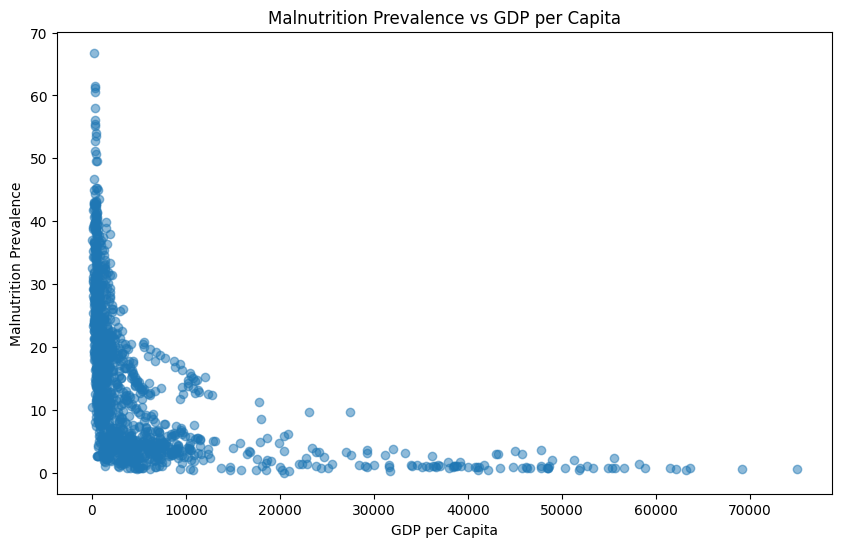

In [ ]:
# Plot the scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['gdp_per_capita'], cleaned_df['malnutrition_prevalence'], alpha=0.5)
plt.title('Malnutrition Prevalence vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Malnutrition Prevalence')
plt.show()


In [ ]:
metadata = pd.read_csv('Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3401556.csv')

In [ ]:
merged_meta_df = pd.merge(cleaned_df, metadata[['Country Code', 'Region', 'IncomeGroup']], on='Country Code')
merged_meta_df = merged_meta_df.dropna()


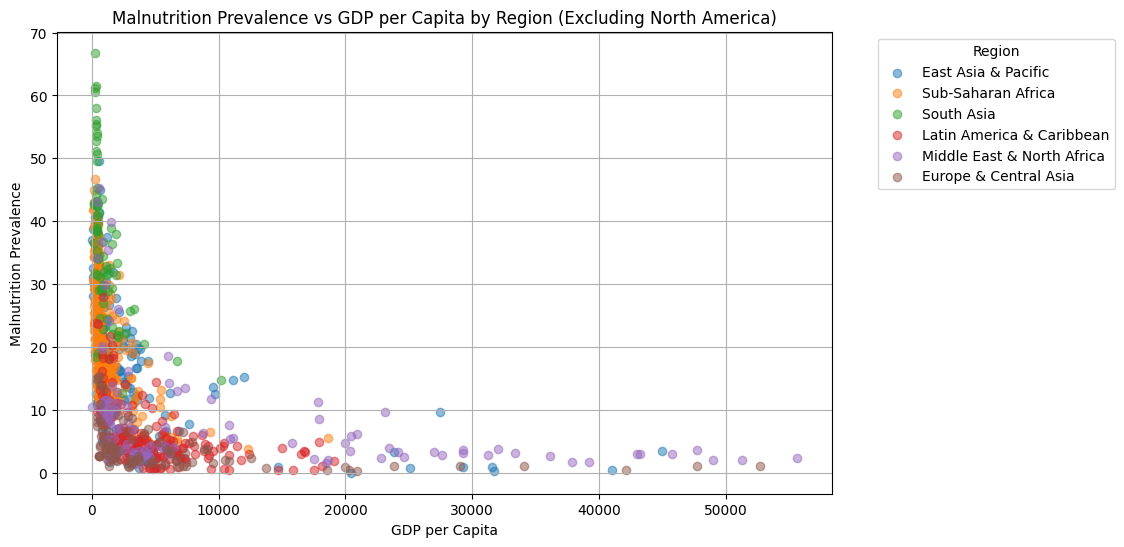

In [ ]:
developing_regions_df = merged_meta_df[merged_meta_df['Region'] != 'North America']

# Plot with different colors for different regions
plt.figure(figsize=(10, 6))
regions = developing_regions_df['Region'].unique()
colors = plt.cm.tab10(range(len(regions)))

for region, color in zip(regions, colors):
    region_df = developing_regions_df[developing_regions_df['Region'] == region]
    plt.scatter(region_df['gdp_per_capita'], region_df['malnutrition_prevalence'],
                label=region, alpha=0.5, c=[color])

# plotting
plt.title('Malnutrition Prevalence vs GDP per Capita by Region (Excluding North America)')
plt.xlabel('GDP per Capita')
plt.ylabel('Malnutrition Prevalence')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

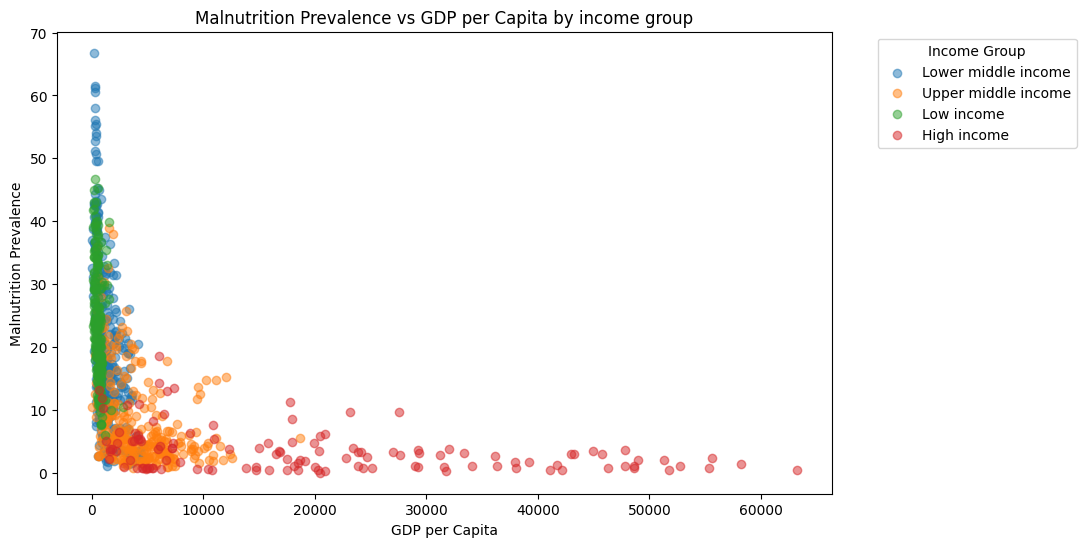

In [ ]:
# Plot with different colors for different income levels

plt.figure(figsize=(10, 6))
plt.title('Malnutrition Prevalence vs GDP per Capita by income group')
plt.xlabel('GDP per Capita')
plt.ylabel('Malnutrition Prevalence')
income_levels = merged_meta_df['IncomeGroup'].unique()
colors = plt.cm.tab10(range(len(income_levels)))

for income_level, color in zip(income_levels, colors):
    level_df = merged_meta_df[merged_meta_df['IncomeGroup'] == income_level]
    plt.scatter(level_df['gdp_per_capita'], level_df['malnutrition_prevalence'],
                label=income_level, alpha=0.5, c=[color])

plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')


In [ ]:
wheat_df = pd.read_csv('wheat.csv')
crude_oil_df = pd.read_csv('crude-oil.csv')
gold_df = pd.read_csv('MyDrive/gold.csv')


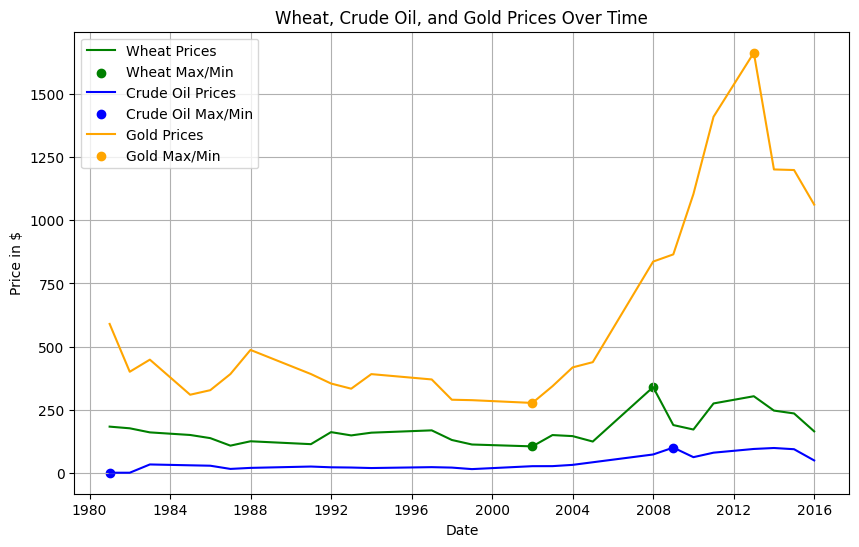

In [ ]:
# Convert the 'Date' columns to datetime format for all dataframes
wheat_df['Date'] = pd.to_datetime(wheat_df['Date'])
crude_oil_df['Date'] = pd.to_datetime(crude_oil_df['Date'])
gold_df['Date'] = pd.to_datetime(gold_df['Date'])

# Merge datasets on the 'Date' column to synchronize time stamps
merged_df = wheat_df.merge(crude_oil_df, on='Date', suffixes=('_wheat', '_oil')) \
                    .merge(gold_df, on='Date')

# Rename the gold value column after the merge
merged_df.rename(columns={'Value': 'Value_gold'}, inplace=True)

# Extract time series for each commodity
dates = merged_df['Date']
wheat_prices = merged_df['Value_wheat']
crude_oil_prices = merged_df['Value_oil']
gold_prices = merged_df['Value_gold']

# Find max and min points for each commodity
max_wheat, min_wheat = wheat_prices.max(), wheat_prices.min()
max_oil, min_oil = crude_oil_prices.max(), crude_oil_prices.min()
max_gold, min_gold = gold_prices.max(), gold_prices.min()

# Find dates of max and min points
max_wheat_date = dates[wheat_prices.idxmax()]
min_wheat_date = dates[wheat_prices.idxmin()]
max_oil_date = dates[crude_oil_prices.idxmax()]
min_oil_date = dates[crude_oil_prices.idxmin()]
max_gold_date = dates[gold_prices.idxmax()]
min_gold_date = dates[gold_prices.idxmin()]

# Plotting the time series
plt.figure(figsize=(10, 6))

# Plot Wheat prices
plt.plot(dates, wheat_prices, label='Wheat Prices', color='green')
plt.scatter([max_wheat_date, min_wheat_date], [max_wheat, min_wheat], color='green', marker='o', label='Wheat Max/Min')

# Plot Crude Oil prices
plt.plot(dates, crude_oil_prices, label='Crude Oil Prices', color='blue')
plt.scatter([max_oil_date, min_oil_date], [max_oil, min_oil], color='blue', marker='o', label='Crude Oil Max/Min')

# Plot Gold prices
plt.plot(dates, gold_prices, label='Gold Prices', color='orange')
plt.scatter([max_gold_date, min_gold_date], [max_gold, min_gold], color='orange', marker='o', label='Gold Max/Min')


# Add labels and title
plt.title('Wheat, Crude Oil, and Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
emission_data = pd.read_csv('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3403796.csv', skiprows = 4)
enrolment_data = pd.read_csv('API_SE.PRM.NENR_DS2_en_csv_v2_3409732.csv', skiprows = 4)

In [ ]:
emission_data_2010 = emission_data['2010']
enrolment_data_2010 = enrolment_data['2010']

emission_data_2010_cleaned = emission_data_2010.dropna()
enrolment_data_2010_cleaned = enrolment_data_2010.dropna()


In [ ]:
emission_mean = emission_data_2010_cleaned.mean()
emission_median = emission_data_2010_cleaned.median()
emission_std_dev = emission_data_2010_cleaned.std()
emission_percentiles = np.percentile(emission_data_2010_cleaned, [5, 25, 75, 95])


enrolment_mean = enrolment_data_2010_cleaned.mean()
enrolment_median = enrolment_data_2010_cleaned.median()
enrolment_std_dev = enrolment_data_2010_cleaned.std()
enrolment_percentiles = np.percentile(enrolment_data_2010_cleaned, [5, 25, 75, 95])

In [ ]:
emission_summary = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation', '5th Percentile', '25th Percentile', '75th Percentile', '95th Percentile'],
    'Value': [emission_mean, emission_median, emission_std_dev, emission_percentiles[0], emission_percentiles[1], emission_percentiles[2], emission_percentiles[3]]
})

emission_table_data = emission_summary.values.tolist()

print(tabulate(emission_table_data, headers=['Statistic', 'Value'], tablefmt='grid'))


+--------------------+-----------+
| Statistic          |     Value |
+====================+===========+
| Mean               |  4.4076   |
+--------------------+-----------+
| Median             |  2.66714  |
+--------------------+-----------+
| Standard Deviation |  5.16505  |
+--------------------+-----------+
| 5th Percentile     |  0.11486  |
+--------------------+-----------+
| 25th Percentile    |  0.756011 |
+--------------------+-----------+
| 75th Percentile    |  6.20007  |
+--------------------+-----------+
| 95th Percentile    | 15.172    |
+--------------------+-----------+


In [ ]:
enrolment_summary = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation', '5th Percentile', '25th Percentile', '75th Percentile', '95th Percentile'],
    'Value': [enrolment_mean, enrolment_median, enrolment_std_dev, enrolment_percentiles[0], enrolment_percentiles[1], enrolment_percentiles[2], enrolment_percentiles[3]]
})

enrolment_table_data = enrolment_summary.values.tolist()

print(tabulate(enrolment_table_data, headers=['Statistic', 'Value'], tablefmt='grid'))


+--------------------+----------+
| Statistic          |    Value |
+====================+==========+
| Mean               | 90.1051  |
+--------------------+----------+
| Median             | 92.9567  |
+--------------------+----------+
| Standard Deviation |  9.52763 |
+--------------------+----------+
| 5th Percentile     | 66.6568  |
+--------------------+----------+
| 25th Percentile    | 87.801   |
+--------------------+----------+
| 75th Percentile    | 95.9344  |
+--------------------+----------+
| 95th Percentile    | 98.8728  |
+--------------------+----------+


In [ ]:
gdp = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3401556.csv', skiprows = 4)
fertility_rate = pd.read_csv('API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_3404027.csv', skiprows = 4)

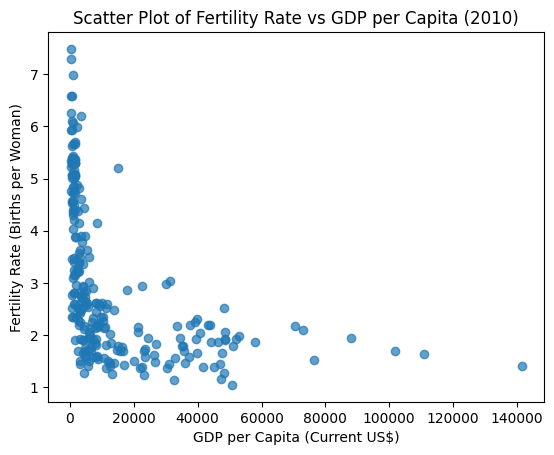

In [ ]:
gdp_2010 = gdp[['Country Name', '2010']].rename(columns={'2010': 'GDP per Capita'})
fertility_2010 = fertility_rate[['Country Name', '2010']].rename(columns={'2010': 'Fertility Rate'})


merged_data = pd.merge(gdp_2010, fertility_2010, on='Country Name')

# Drop rows with missing values
merged_data = merged_data.dropna()

# Plot the scatter plot
plt.scatter(merged_data['GDP per Capita'], merged_data['Fertility Rate'], alpha=0.7)
plt.xlabel('GDP per Capita (Current US$)')
plt.ylabel('Fertility Rate (Births per Woman)')
plt.title('Scatter Plot of Fertility Rate vs GDP per Capita (2010)')
plt.show()

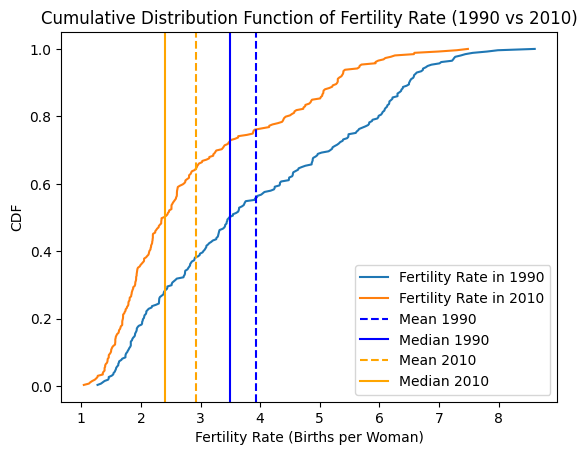

In [ ]:
# Extract fertility rates for 1990 and 2010
fertility_1990 = fertility_rate['1990'].dropna()
fertility_2010 = fertility_rate['2010'].dropna()

# Calculate mean and median for each year
mean_1990 = fertility_1990.mean()
median_1990 = fertility_1990.median()
mean_2010 = fertility_2010.mean()
median_2010 = fertility_2010.median()

# Sort data for CDF plotting
sorted_fertility_1990 = np.sort(fertility_1990)
sorted_fertility_2010 = np.sort(fertility_2010)

# Calculate CDFs
cdf_1990 = np.arange(1, len(sorted_fertility_1990) + 1) / len(sorted_fertility_1990)
cdf_2010 = np.arange(1, len(sorted_fertility_2010) + 1) / len(sorted_fertility_2010)

# Plot the CDFs
plt.plot(sorted_fertility_1990, cdf_1990, label='Fertility Rate in 1990')
plt.plot(sorted_fertility_2010, cdf_2010, label='Fertility Rate in 2010')

# Add vertical lines for mean and median
plt.axvline(mean_1990, color='blue', linestyle='--', label='Mean 1990')
plt.axvline(median_1990, color='blue', linestyle='-', label='Median 1990')
plt.axvline(mean_2010, color='orange', linestyle='--', label='Mean 2010')
plt.axvline(median_2010, color='orange', linestyle='-', label='Median 2010')

# Add labels and legend
plt.xlabel('Fertility Rate (Births per Woman)')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Fertility Rate (1990 vs 2010)')
plt.legend()

# Show the plot
plt.show()


In [ ]:
HPI = pd.read_excel('hpi-data-2016.xlsx', "Complete HPI data", skiprows = 5)
CPI = pd.read_excel('CPI2016_Results.xlsx', "CPI2016_FINAL_16Jan")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


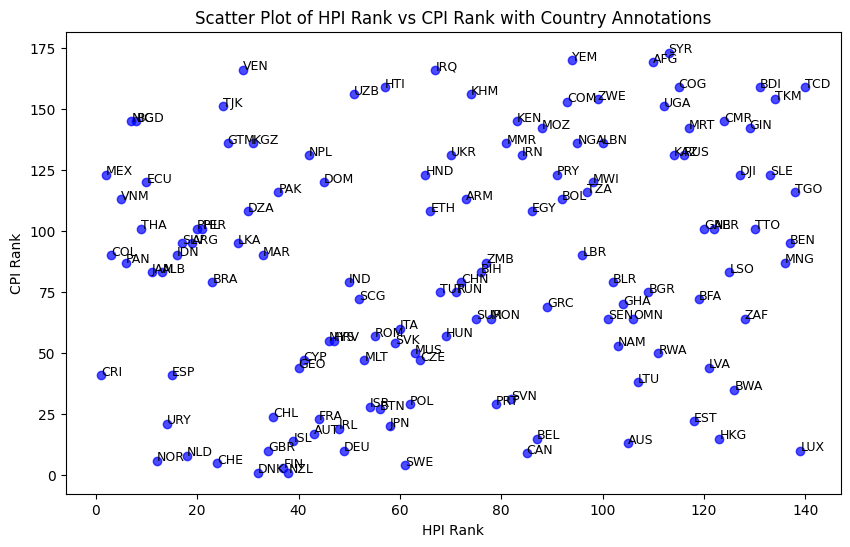

In [ ]:
# Merge based on Country
data_merged = pd.merge(HPI[['Country', 'HPI Rank']], CPI[['Country', 'Rank', 'WB Code']],
                     on='Country', suffixes=('_HPI', '_CPI'))

# Remove rows with missing values
data_merged = data_merged.dropna()

# Scatter plot with country codes
plt.figure(figsize=(10, 6))
plt.scatter(data_merged['HPI Rank'], data_merged['Rank'], color='blue', alpha=0.7)

# Annotate points with country codes
for i, row in data_merged.iterrows():
    plt.text(row['HPI Rank'], row['Rank'], row['WB Code'], fontsize=9)

# Label the axes and add title
plt.xlabel('HPI Rank')
plt.ylabel('CPI Rank')
plt.title('Scatter Plot of HPI Rank vs CPI Rank with Country Annotations')

plt.show()


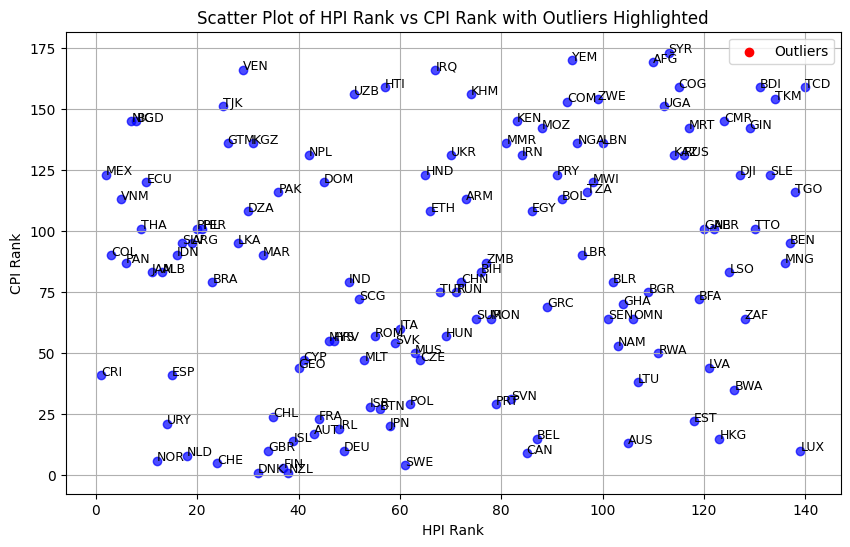

,Country,HPI Rank,Rank


In [ ]:

# Calculate the z-scores for HPI and CPI ranks
data_merged['Z_HPI'] = (data_merged['HPI Rank'] - data_merged['HPI Rank'].mean()) / data_merged['HPI Rank'].std()
data_merged['Z_CPI'] = (data_merged['Rank'] - data_merged['Rank'].mean()) / data_merged['Rank'].std()

outliers = data_merged[(np.abs(data_merged['Z_HPI']) > 2) | (np.abs(data_merged['Z_CPI']) > 2)]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_merged['HPI Rank'], data_merged['Rank'], color='blue', alpha=0.7)

# Highlight the outliers in red
plt.scatter(outliers['HPI Rank'], outliers['Rank'], color='red', label='Outliers')

# Annotate points with country codes
for i, row in data_merged.iterrows():
    plt.text(row['HPI Rank'], row['Rank'], row['WB Code'], fontsize=9)

# Annotate outliers in bold
for i, row in outliers.iterrows():
    plt.text(row['HPI Rank'], row['Rank'], row['WB Code'], fontsize=9, weight='bold')

plt.xlabel('HPI Rank')
plt.ylabel('CPI Rank')
plt.title('Scatter Plot of HPI Rank vs CPI Rank with Outliers Highlighted')

# Add legend
plt.legend()

plt.grid(True)
plt.show()

# Print outlier countries
outliers[['Country', 'HPI Rank', 'Rank']]
